In [2]:
#downloading files
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#access the file through id
id = "1t7hO5xVMA56-E_Zp6tbCZO8UJQiXP-Lk"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile("Dataset.zip")
id1 = "166SDf0UrEIYe2DEWHMfIOblBo35VxiF3"
downloaded = drive.CreateFile({'id':id1})
downloaded.GetContentFile("gt_training.csv")

!unzip "/content/Dataset.zip" -d "/content/"

Archive:  /content/Dataset.zip
  inflating: /content/test.zip       
  inflating: /content/training.zip   
  inflating: /content/validation.zip  


In [3]:
!unzip "/content/test.zip" -d "/content/"
!unzip "/content/training.zip" -d "/content/"
!unzip "/content/validation.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
 extracting: /content/training/09222.png  
 extracting: /content/training/09223.png  
 extracting: /content/training/09224.png  
 extracting: /content/training/09225.png  
 extracting: /content/training/09226.png  
 extracting: /content/training/09227.png  
 extracting: /content/training/09232.png  
 extracting: /content/training/09233.png  
 extracting: /content/training/09234.png  
 extracting: /content/training/09235.png  
 extracting: /content/training/09237.png  
 extracting: /content/training/09239.png  
 extracting: /content/training/09240.png  
 extracting: /content/training/09241.png  
 extracting: /content/training/09243.png  
 extracting: /content/training/09244.png  
 extracting: /content/training/09245.png  
 extracting: /content/training/09246.png  
 extracting: /content/training/09248.png  
 extracting: /content/training/09249.png  
 extracting: /content/training/09250.png  
 extracting: /content/training/09251.png  
 ex

In [4]:
import torch.nn as nn
from torch import nn
import torch
import torchvision
from torchvision import transforms
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import OrderedDict
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torchvision import transforms
import random
import os
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
import pandas as pd
df = pd.read_csv('/content/gt_training.csv')
id_df = df['Image ID'].values
class_df = df['Image class'].values
dict_df = dict(zip(id_df,class_df))
training_data = os.listdir('/content/training')
val_data = os.listdir('/content/validation')
test_data = os.listdir('/content/test')

In [7]:
print(training_data)
print(val_data)
print(test_data)

['11290.png', '00081.png', '01733.png', '12943.png', '06318.png', '01419.png', '03895.png', '11233.png', '08888.png', '07092.png', '07728.png', '11434.png', '08617.png', '03899.png', '08266.png', '02302.png', '07049.png', '01467.png', '11567.png', '08548.png', '09981.png', '09137.png', '03348.png', '09352.png', '11915.png', '08832.png', '08417.png', '02244.png', '03005.png', '02515.png', '03696.png', '02098.png', '13593.png', '02119.png', '06621.png', '06640.png', '04253.png', '13558.png', '08076.png', '08176.png', '13327.png', '10235.png', '13234.png', '04710.png', '03446.png', '09586.png', '01214.png', '08310.png', '00385.png', '12885.png', '04714.png', '07967.png', '06728.png', '05376.png', '07087.png', '10401.png', '03078.png', '11417.png', '02710.png', '05030.png', '11786.png', '03761.png', '02519.png', '08258.png', '04507.png', '03224.png', '09699.png', '11291.png', '03698.png', '06225.png', '00986.png', '03059.png', '13159.png', '09180.png', '03790.png', '00857.png', '08471.png'

In [8]:
train_labels, val_labels, test_labels = [], [], []
for i in training_data:
  id = int(i.split('.')[0])
  if id in id_df:
    train_labels.append(dict_df[id])
for i in val_data:
  id = int(i.split('.')[0])
  if id in id_df:
    val_labels.append(dict_df[id])
for i in test_data:
  id = int(i.split('.')[0])
  if id in id_df:
    test_labels.append(dict_df[id])


In [9]:
print(train_labels)
print(val_labels)
print(test_labels)

['NuMem', 'Homogeneous', 'Homogeneous', 'Golgi', 'Nucleolar', 'Homogeneous', 'Speckled', 'NuMem', 'Centromere', 'Nucleolar', 'Nucleolar', 'NuMem', 'Centromere', 'Speckled', 'Centromere', 'Homogeneous', 'Nucleolar', 'Homogeneous', 'NuMem', 'Centromere', 'Centromere', 'Centromere', 'Speckled', 'Centromere', 'NuMem', 'Centromere', 'Centromere', 'Homogeneous', 'Speckled', 'Speckled', 'Speckled', 'Homogeneous', 'Golgi', 'Homogeneous', 'Nucleolar', 'Nucleolar', 'Speckled', 'Golgi', 'Centromere', 'Centromere', 'Golgi', 'Centromere', 'Golgi', 'Speckled', 'Speckled', 'Centromere', 'Homogeneous', 'Centromere', 'Homogeneous', 'Golgi', 'Speckled', 'Centromere', 'Nucleolar', 'Nucleolar', 'Nucleolar', 'Centromere', 'Speckled', 'NuMem', 'Speckled', 'Speckled', 'NuMem', 'Speckled', 'Speckled', 'Centromere', 'Speckled', 'Speckled', 'Centromere', 'NuMem', 'Speckled', 'Nucleolar', 'Homogeneous', 'Speckled', 'Golgi', 'Centromere', 'Speckled', 'Homogeneous', 'Centromere', 'Nucleolar', 'Nucleolar', 'Speckle

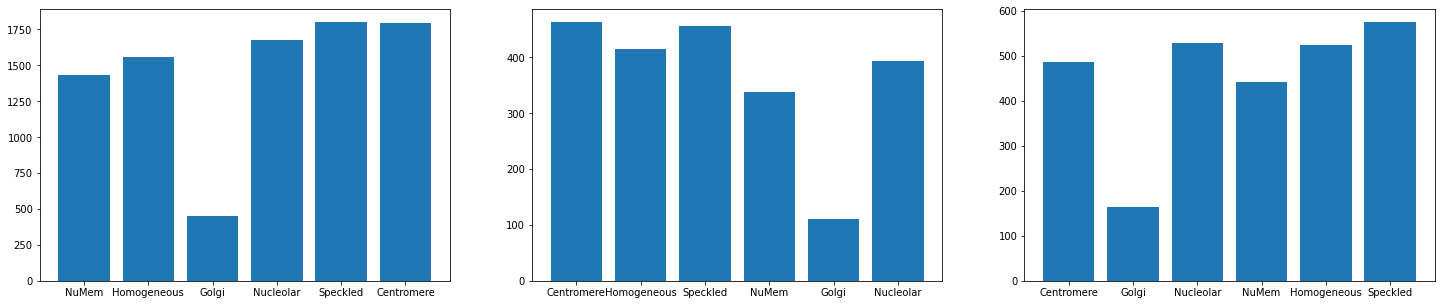

In [28]:
from collections import Counter
import matplotlib.pyplot as plt

freq_training = Counter(train_labels)
freq_val = Counter(val_labels)
freq_testing = Counter(test_labels)


fig, ax = plt.subplots(1, 3, figsize = (25, 5))
ax[0].bar(freq_training.keys(), freq_training.values())
ax[1].bar(freq_val.keys(), freq_val.values())
ax[2].bar(freq_testing.keys(), freq_testing.values())
fig.show()

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit([['Centromere'],['Golgi'],['Homogeneous'],['Nucleolar'],['NuMem'],['Speckled']])
print(np.array(train_labels).reshape(-1,1).shape)

train_labels = enc.transform(np.array(train_labels).reshape(-1,1)).toarray()
val_labels = enc.transform(np.array(val_labels).reshape(-1,1)).toarray()
test_labels = enc.transform(np.array(test_labels).reshape(-1,1)).toarray()

(8701, 1)


In [ ]:
print(train_labels)
print(val_labels)
print(test_labels)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
normalize = transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225]
)

transform = transforms.Compose([
    transforms.Resize(300),
    transforms.CenterCrop(300),
    transforms.RandomAffine(5),
    transforms.ToTensor(), 
    transforms.Lambda(lambda x: x.repeat(3,1,1)), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def default_loader(path):
    img = Image.open(path)
    # img = img.resize((224,224))
    img_tensor = transform(img)
    return img_tensor

# training dataset loader
class trainset(Dataset):
    
    def __init__(self, loader=default_loader):
        # define the paths of images
        self.images = training_data
        self.target = torch.tensor(train_labels, dtype=float)
        self.loader = loader
        
    def __getitem__(self, index):
        fn = '/content/training/'+self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        return img,target
    
    def __len__(self):
        return len(self.images)
# validation dataset loader
class valset(Dataset):
    
    def __init__(self, loader=default_loader):
        # define the paths of images
        self.images = val_data
        self.target = torch.tensor(val_labels, dtype=float)
        self.loader = loader
        
    def __getitem__(self, index):
        fn = '/content/validation/' + self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        return img,target
    
    def __len__(self):
        return len(self.images)
# test dataset loader
class testset(Dataset):
    def __init__(self, loader=default_loader):
        self.images = test_data
        self.loader = loader
    
    def __getitem__(self, index):
        fn = '/content/test/' + self.images[index]
        img = self.loader(fn)
        return img
    
    def __len__(self):
        return len(self.images)

In [ ]:
from torchvision import models
# model function
def model(pretrained, requires_grad):
    model = models.alexnet(progress=True, pretrained=pretrained)
    # to freeze the hidden laye
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    # to train the hidden layers
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    return model

In [ ]:
alexnet_model = model(pretrained=True, requires_grad=False)
alexnet_model.classifier = torch.nn.Sequential(nn.Dropout(0.4),
                                       nn.Linear(256 * 6 * 6, 4096),
                                       nn.ReLU(inplace=True),
                                       nn.Dropout(0.4),
                                       nn.Linear(4096, 4096),
                                       nn.ReLU(inplace=True),
                                       nn.Dropout(0.4),
                                       nn.Linear(4096, 1000),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(1000,6))

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
alexnet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.4, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# train function
def train(model, dataloader, optimizer, criterion, train_data, device):
  print('Training')
  model.train().to(device)
  counter = 0
  train_running_loss = 0.0
  for i, (data,target) in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
    counter += 1
    optimizer.zero_grad()
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    loss = criterion(outputs, torch.max(target, 1)[1])
    train_running_loss += loss.item()
    # backpropagation
    loss.backward()
    # update optimizer parameters
    optimizer.step()

      
  train_loss = train_running_loss / counter
  return train_loss

# validation function
def validate(model, dataloader, criterion, val_data, device):
  print('Validating')
  model.eval().to(device)
  counter = 0
  val_running_loss = 0.0
  for i, (data,target) in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
    counter += 1
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    loss = criterion(outputs, torch.max(target, 1)[1])
    val_running_loss += loss.item()
  val_loss = val_running_loss / counter
  return val_loss

In [ ]:
train_set = trainset()
val_set = valset()
test_set = testset()

trainloader = DataLoader(train_set, batch_size=256, shuffle=True)
valloader = DataLoader(val_set, batch_size=256)
testloader = DataLoader(test_set, batch_size=4)

In [ ]:
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score
import torch.optim as optim
from torch.optim import lr_scheduler
from tqdm import trange
from PIL import Image
import matplotlib
# intialize the model
alexnet = alexnet_model.to(device)
# learning parameters
lr = 0.001
epochs = 20
# optimizer
optimizer = torch.optim.Adam(alexnet.parameters(), lr=lr)
# loss function
criterion = nn.CrossEntropyLoss()

# start the training and validation
train_loss = []
valid_loss = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        alexnet, trainloader, optimizer, criterion, train_set, device
    )
    valid_epoch_loss = validate(
        alexnet, valloader, criterion, val_set, device
    )
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}", )
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 20
Training


  0%|          | 0/33 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
34it [00:38,  1.12s/it]


Validating


9it [00:09,  1.04s/it]


Train Loss: 1.0254
Val Loss: 0.4287
Epoch 2 of 20
Training


34it [00:37,  1.10s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.4103
Val Loss: 0.3236
Epoch 3 of 20
Training


34it [00:37,  1.10s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.3263
Val Loss: 0.2278
Epoch 4 of 20
Training


34it [00:37,  1.10s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.2682
Val Loss: 0.2399
Epoch 5 of 20
Training


34it [00:37,  1.10s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.2608
Val Loss: 0.1973
Epoch 6 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.2345
Val Loss: 0.1872
Epoch 7 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.2240
Val Loss: 0.1981
Epoch 8 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.2166
Val Loss: 0.1637
Epoch 9 of 20
Training


34it [00:37,  1.10s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.2015
Val Loss: 0.1708
Epoch 10 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.1861
Val Loss: 0.1903
Epoch 11 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.1938
Val Loss: 0.1653
Epoch 12 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.1790
Val Loss: 0.1779
Epoch 13 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.1629
Val Loss: 0.1649
Epoch 14 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.1511
Val Loss: 0.1947
Epoch 15 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.1458
Val Loss: 0.1664
Epoch 16 of 20
Training


34it [00:38,  1.12s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.1519
Val Loss: 0.1639
Epoch 17 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.1628
Val Loss: 0.1703
Epoch 18 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.05s/it]


Train Loss: 0.1700
Val Loss: 0.1734
Epoch 19 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]


Train Loss: 0.1459
Val Loss: 0.1618
Epoch 20 of 20
Training


34it [00:37,  1.11s/it]


Validating


9it [00:09,  1.06s/it]

Train Loss: 0.1453
Val Loss: 0.1615


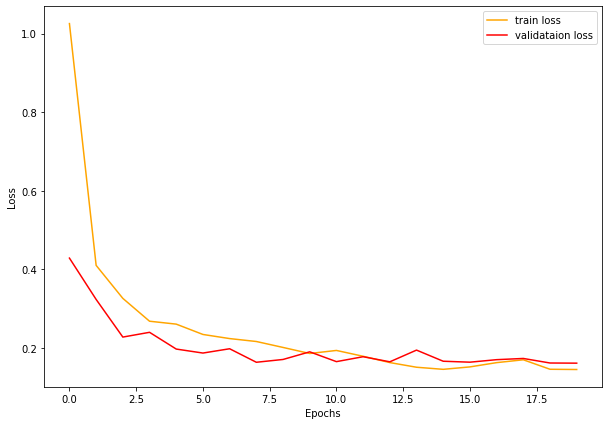

In [ ]:
# save the trained model to disk
torch.save({
            'epoch': epochs,
            'model_state_dict': alexnet.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, 'model.pth')
# plot and save the train and validation line graphs
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(valid_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')
plt.show()

In [ ]:
# load the model checkpoint
checkpoint = torch.load('model.pth')
# load model weights state_dict
alexnet.load_state_dict(checkpoint['model_state_dict'])
alexnet.eval()
scores = []
results = []

for _, data in enumerate(testloader):
  data = data.to(device)
  # get the predictions by passing the image through the model
  outputs = alexnet(data)
  outputs = torch.max(outputs,1)[1]
  outputs = outputs.detach().cpu().numpy()
  results.append(outputs)
y_true = np.argmax(test_labels,axis=1)
print(y_true.shape)
y_pred = np.array(results).flatten()
print(y_pred.shape)
 

(2720,)
(2720,)


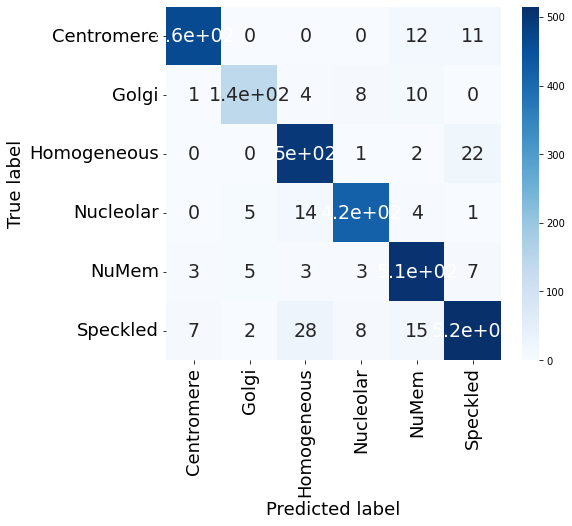

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, average_precision_score,precision_score,f1_score,recall_score

cm = confusion_matrix(y_true, y_pred)
conf_matrix = pd.DataFrame(cm, index=['Centromere','Golgi','Homogeneous','Nucleolar','NuMem','Speckled'], columns=['Centromere','Golgi','Homogeneous','Nucleolar','NuMem','Speckled'])
# plot size setting
fig, ax = plt.subplots(figsize = (7.5,6.5))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 19}, cmap="Blues")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('confusion.pdf', bbox_inches='tight')
plt.show()

In [ ]:
print('------Weighted------')
print('Weighted precision', precision_score(y_true, y_pred, average='weighted'))
print('Weighted recall', recall_score(y_true, y_pred, average='weighted'))
print('Weighted f1-score', f1_score(y_true, y_pred, average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(y_true, y_pred, average='macro'))
print('Macro recall', recall_score(y_true, y_pred, average='macro'))
print('Macro f1-score', f1_score(y_true, y_pred, average='macro'))
print('------Micro------')
print('Micro precision', precision_score(y_true, y_pred, average='micro'))
print('Micro recall', recall_score(y_true, y_pred, average='micro'))
print('Micro f1-score', f1_score(y_true, y_pred, average='micro'))

------Weighted------
Weighted precision 0.935716030846689
Weighted recall 0.9352941176470588
Weighted f1-score 0.935190316116234
------Macro------
Macro precision 0.9352988296121714
Macro recall 0.9278516416621629
Macro f1-score 0.9311842600405779
------Micro------
Micro precision 0.9352941176470588
Micro recall 0.9352941176470588
Micro f1-score 0.9352941176470588
